In [28]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [30]:
!cp '/content/drive/My Drive/Colab Notebooks/Projects/Dataset' -r .

In [31]:
# Import Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

print(tf.__version__)
print("Libraries imported!")

2.2.0
Libraries imported!


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("helper Libraries imported!")

helper Libraries imported!


In [33]:
# 64 X 64 Pixels
img_width = 64
img_height = 64

In [34]:
img_data_gen = ImageDataGenerator(rescale=1/ 255.0, validation_split=0.2)

In [35]:
train_data_gen = img_data_gen.flow_from_directory(directory='/content/Dataset/Train', target_size=(img_width, img_height),
                                                  class_mode='binary', batch_size=16,
                                                  subset='training')

Found 333 images belonging to 2 classes.


In [36]:
validation_data_gen = img_data_gen.flow_from_directory(directory='/content/Dataset/Train', target_size=(img_width, img_height),
                                                  class_mode='binary', batch_size=16,
                                                  subset='validation')

Found 83 images belonging to 2 classes.


In [41]:
train_data_gen.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit_generator(generator=train_data_gen, steps_per_epoch=len(train_data_gen),
                              epochs=20, validation_data=validation_data_gen,
                              validation_steps=len(validation_data_gen))

Epoch 1/20
21/21 [==============================] - 2s 71ms/step - loss: 0.5299 - accuracy: 0.7477 - val_loss: 0.6424 - val_accuracy: 0.6386
Epoch 2/20
21/21 [==============================] - 1s 70ms/step - loss: 0.5408 - accuracy: 0.7147 - val_loss: 0.5793 - val_accuracy: 0.6627
Epoch 3/20
21/21 [==============================] - 1s 70ms/step - loss: 0.4612 - accuracy: 0.7838 - val_loss: 0.5464 - val_accuracy: 0.6747
Epoch 4/20
21/21 [==============================] - 2s 72ms/step - loss: 0.4710 - accuracy: 0.7748 - val_loss: 0.4422 - val_accuracy: 0.8072
Epoch 5/20
21/21 [==============================] - 1s 70ms/step - loss: 0.4314 - accuracy: 0.8138 - val_loss: 0.4832 - val_accuracy: 0.7590
Epoch 6/20
21/21 [==============================] - 1s 70ms/step - loss: 0.4075 - accuracy: 0.8138 - val_loss: 0.4506 - val_accuracy: 0.7711
Epoch 7/20
21/21 [==============================] - 2s 71ms/step - loss: 0.4170 - accuracy: 0.8108 - val_loss: 0.4552 - val_accuracy: 0.7590
Epoch 8/20
21

In [49]:
history.history

{'accuracy': [0.7477477192878723,
  0.7147147059440613,
  0.7837837934494019,
  0.7747747898101807,
  0.8138138055801392,
  0.8138138055801392,
  0.8108108043670654,
  0.8318318128585815,
  0.8588588833808899,
  0.9009009003639221,
  0.8888888955116272,
  0.912912905216217,
  0.9159159064292908,
  0.9399399161338806,
  0.9429429173469543,
  0.9369369149208069,
  0.9369369149208069,
  0.9459459185600281,
  0.9459459185600281,
  0.9579579830169678],
 'loss': [0.5299443602561951,
  0.54082852602005,
  0.4611656367778778,
  0.4710128903388977,
  0.4314485490322113,
  0.4075325131416321,
  0.4169903099536896,
  0.38506221771240234,
  0.32459214329719543,
  0.284058541059494,
  0.27782967686653137,
  0.25218069553375244,
  0.2255074679851532,
  0.2091117799282074,
  0.1929885596036911,
  0.17352573573589325,
  0.2017509490251541,
  0.15121705830097198,
  0.13897310197353363,
  0.12066411972045898],
 'val_accuracy': [0.6385542154312134,
  0.6626505851745605,
  0.6746987700462341,
  0.80722892

In [57]:
def plot_learningCurve(history, epochs):
  epoch_range=range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

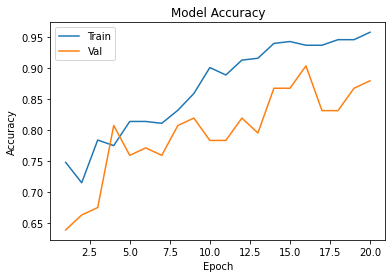

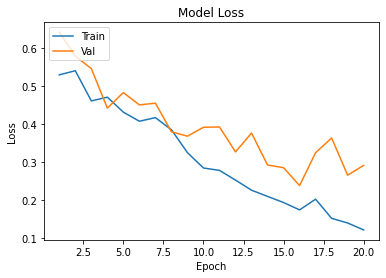

In [58]:
plot_learningCurve(history, 20)